In [3]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_icu = pd.read_csv("Kaggle_Sirio_Libanes_ICU_Prediction.csv")

In [5]:
data_icu.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [6]:
data_icu.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

# Coverting Disease Grouping Features into Binary

The disease grouping columns are either 0 or 1 in float data type. So these feature must be converted into binary 

In [7]:
features_to_convert = ['DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6']

for feature in features_to_convert:
    most_frequent_number = data_icu[feature].mode()[0]
    data_icu[feature] = data_icu[feature].fillna(0).astype('int64')   

# **Creating metadata** <br />



In [8]:
data_feature= []
for feature in data_icu.columns:
    #Defining Roles
    if feature == 'ICU':
        use = 'target'
    elif feature == 'PATIENT_VISIT_IDENTIFIER':
        use = 'id'
    else:
        use = 'input'
    
    #Defining the type
    
    if data_icu[feature].dtype == object:
            type= 'categorical'
    elif data_icu[feature].dtype == 'int64' :
        are_values_binary = data_icu[feature].isin([0, 1]).all()
        if feature == 'ICU' or feature == 'GENDER' or are_values_binary :
            type = 'binary'
        else:
            type = 'integer'
    elif data_icu[feature].dtype == float:
        type ='real'
    
    preserve= True
    
    dtype = data_icu[feature].dtype
    
    feature_dictionary = {
        'varname': feature,
        'use': use,
        'type': type,
        'preserve': preserve,
        'dtype': dtype
    }
            
    data_feature.append(feature_dictionary)
    
meta_data = pd.DataFrame(data_feature, columns= ['varname', 'use', 'type', 'preserve', 'dtype'])
meta_data.set_index('varname', inplace= True)
meta_data
    

,use,type,preserve,dtype
varname,,,,
PATIENT_VISIT_IDENTIFIER,id,integer,True,int64
AGE_ABOVE65,input,binary,True,int64
AGE_PERCENTIL,input,categorical,True,object
GENDER,input,binary,True,int64
DISEASE GROUPING 1,input,binary,True,int64
...,...,...,...,...
RESPIRATORY_RATE_DIFF_REL,input,real,True,float64
TEMPERATURE_DIFF_REL,input,real,True,float64
OXYGEN_SATURATION_DIFF_REL,input,real,True,float64


In [9]:
data_icu.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    PATIENT_VISIT_IDENTIFIER          1925 non-null   int64  
 1    AGE_ABOVE65                       1925 non-null   int64  
 2    AGE_PERCENTIL                     1925 non-null   object 
 3    GENDER                            1925 non-null   int64  
 4    DISEASE GROUPING 1                1925 non-null   int64  
 5    DISEASE GROUPING 2                1925 non-null   int64  
 6    DISEASE GROUPING 3                1925 non-null   int64  
 7    DISEASE GROUPING 4                1925 non-null   int64  
 8    DISEASE GROUPING 5                1925 non-null   int64  
 9    DISEASE GROUPING 6                1925 non-null   int64  
 10   HTN                               1920 non-null   float64
 11   IMMUNOCOMPROMISED                 1920 non-null   floa

In [10]:
data_icu.drop_duplicates()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0,0,0,0,1,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0,0,0,0,1,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0,0,0,0,1,1,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0,0,0,0,1,1,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


# **Data pre processing and cleaning**

Here we are looking at missing values

In [11]:
def clean_feature(value):
    if 'ABOVE' in value:
        return 13
    elif '-' in value:
        range_values = value.split('-')
        return float(int(range_values[0]) + int(range_values[1]))/2
    else:
        return float(value)
    
data_icu['WINDOW'] = data_icu['WINDOW'].apply(clean_feature)

print(data_icu['WINDOW'])
data_icu.tail()

    
        

0        1.0
1        3.0
2        5.0
3        9.0
4       13.0
        ... 
1920     1.0
1921     3.0
1922     5.0
1923     9.0
1924    13.0
Name: WINDOW, Length: 1925, dtype: float64


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
1920,384,0,50th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0
1921,384,0,50th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.0,0
1922,384,0,50th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.0,0
1923,384,0,50th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,9.0,0
1924,384,0,50th,1,0,0,1,0,0,0,...,-0.547619,-0.838384,-0.701863,-0.585967,-0.763868,-0.612903,-0.551337,-0.835052,13.0,0


In [12]:
data_icu.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1920.000000,...,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108052,0.028052,0.097662,0.019740,0.127792,0.046753,0.213021,...,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,6.200000,0.267532
std,111.168431,0.499074,0.482613,0.310527,0.165164,0.296935,0.139143,0.333945,0.211165,0.409549,...,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,4.309251,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,5.000000,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,9.000000,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000


# Visualising missing data <br />


In [13]:
data =  data_icu.drop(columns= 'ICU')
target = data_icu['ICU']

<Axes: >

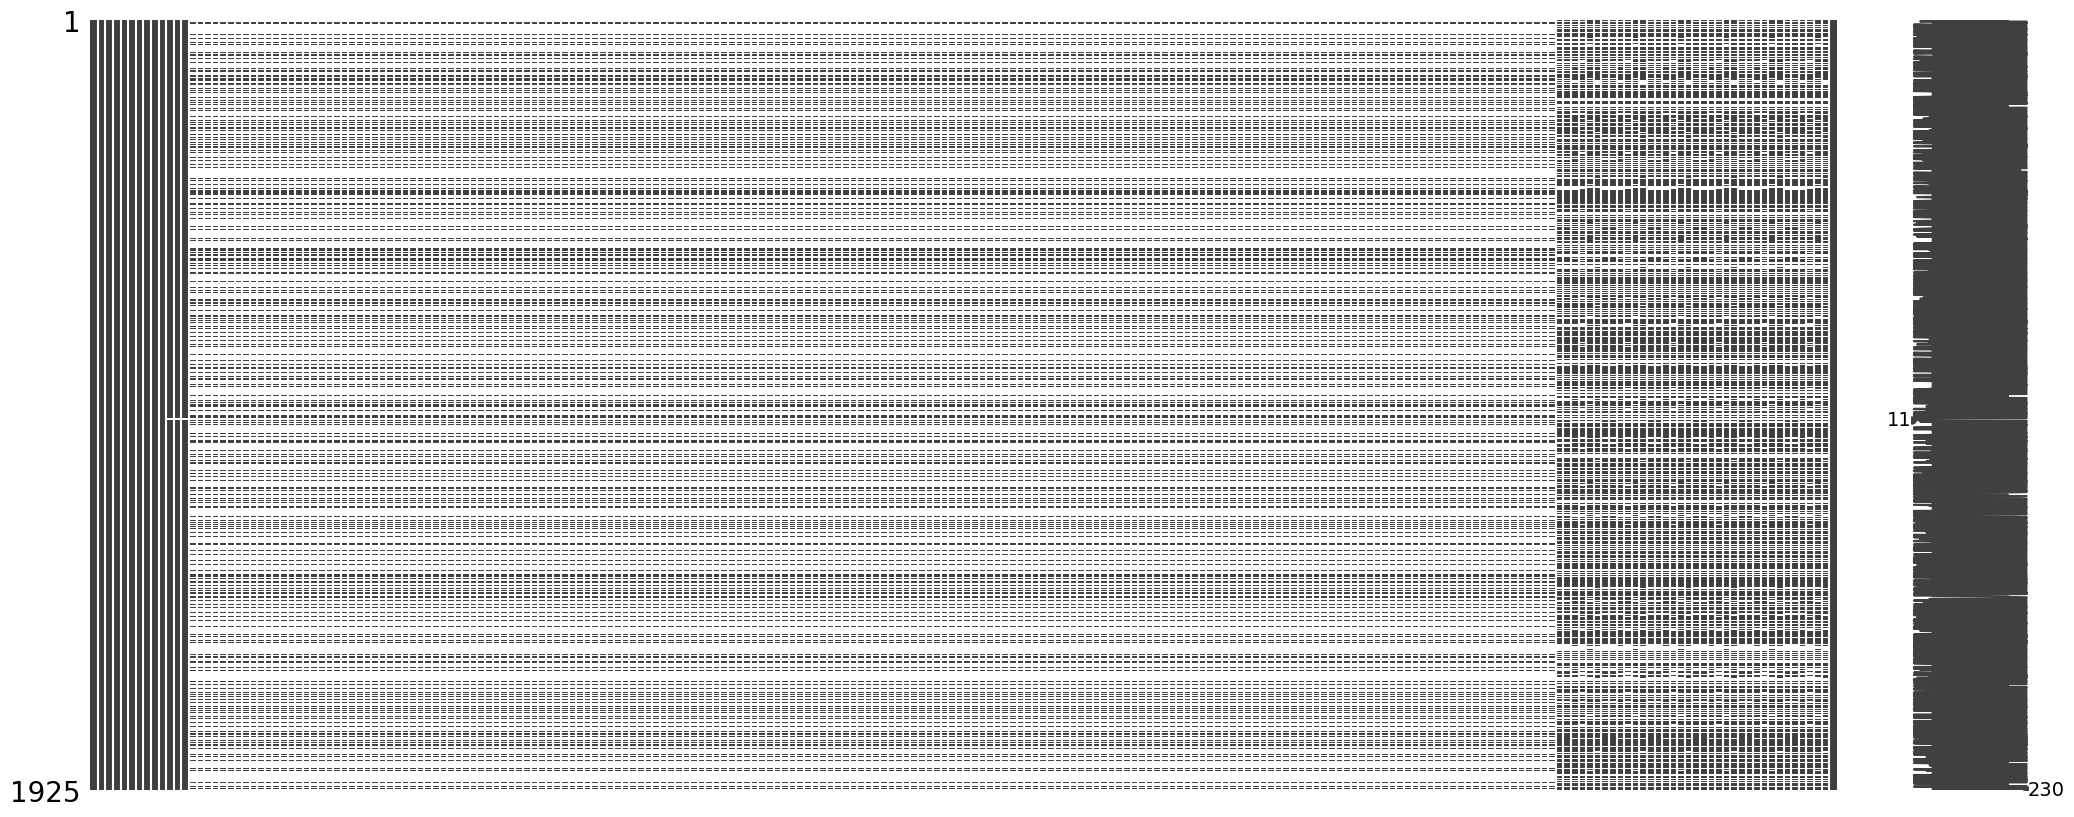

In [14]:
msno.matrix(data)

<Axes: >

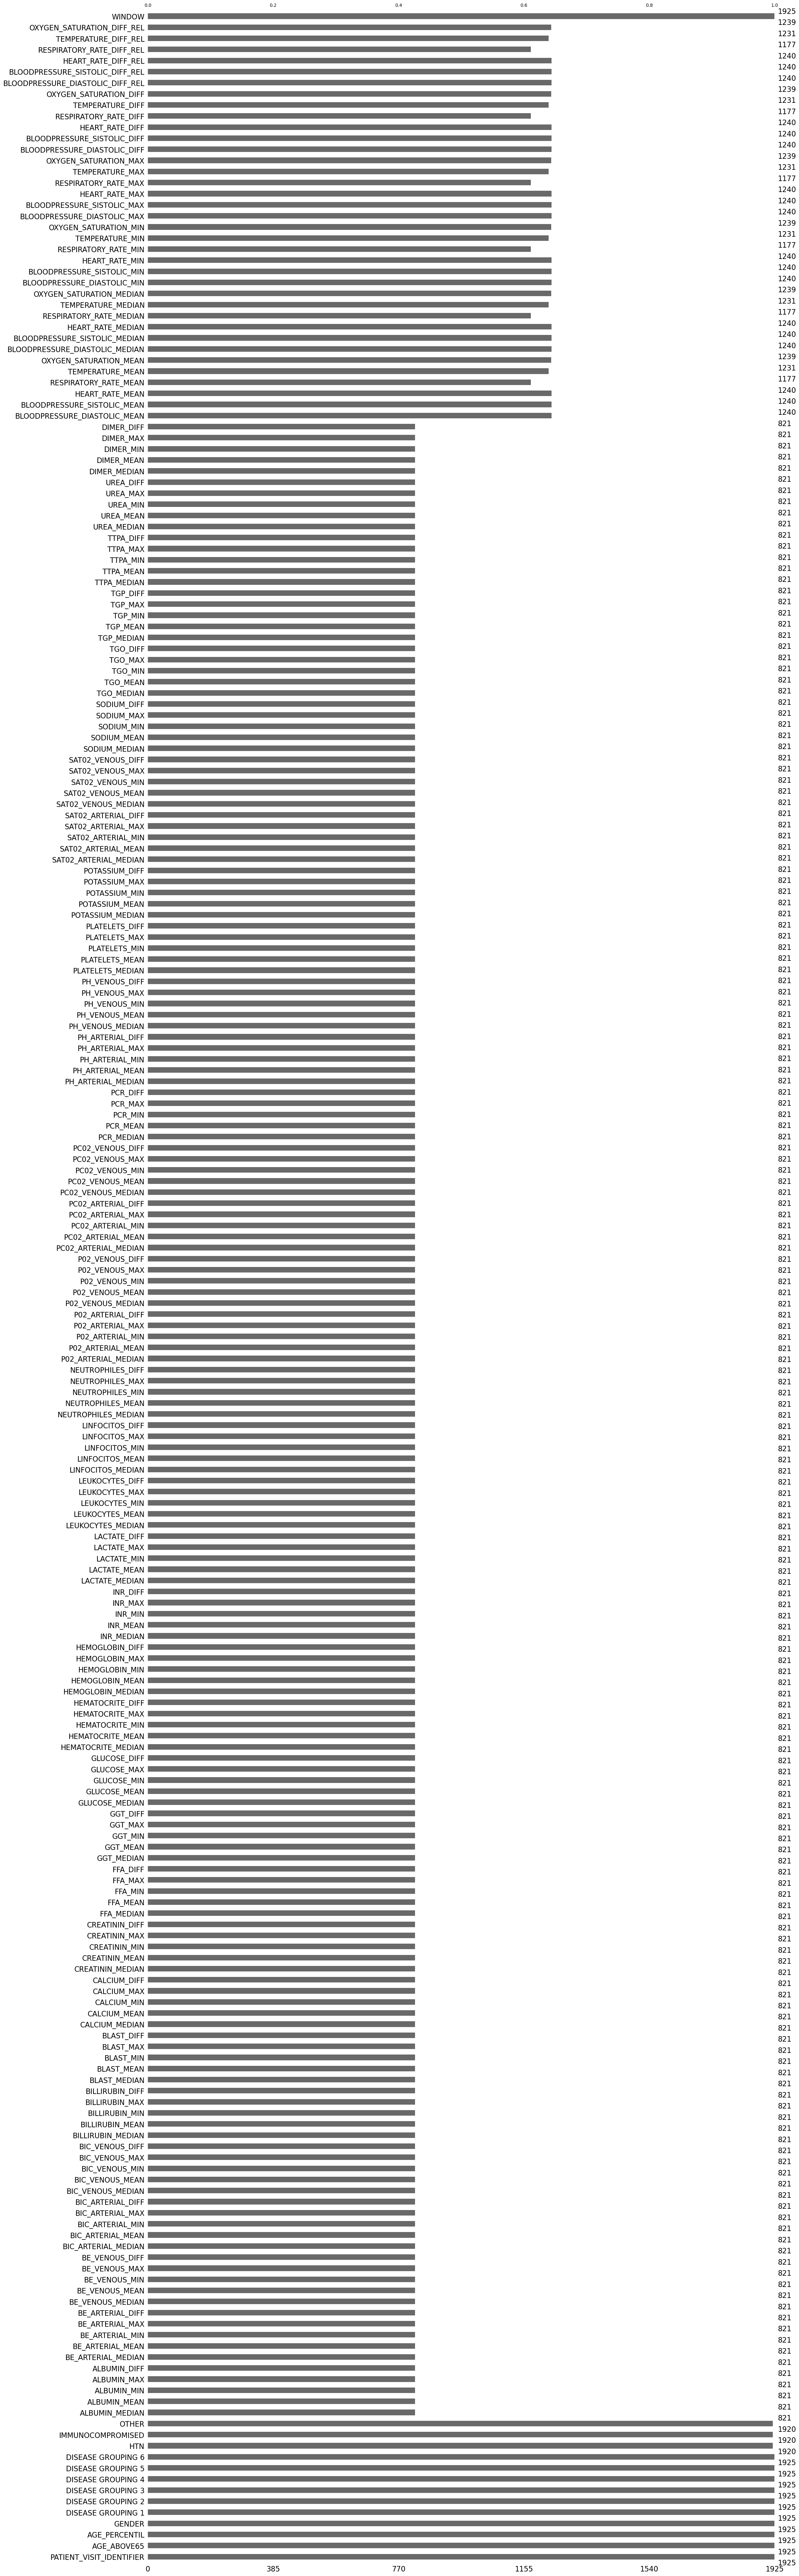

In [15]:
msno.bar(data)

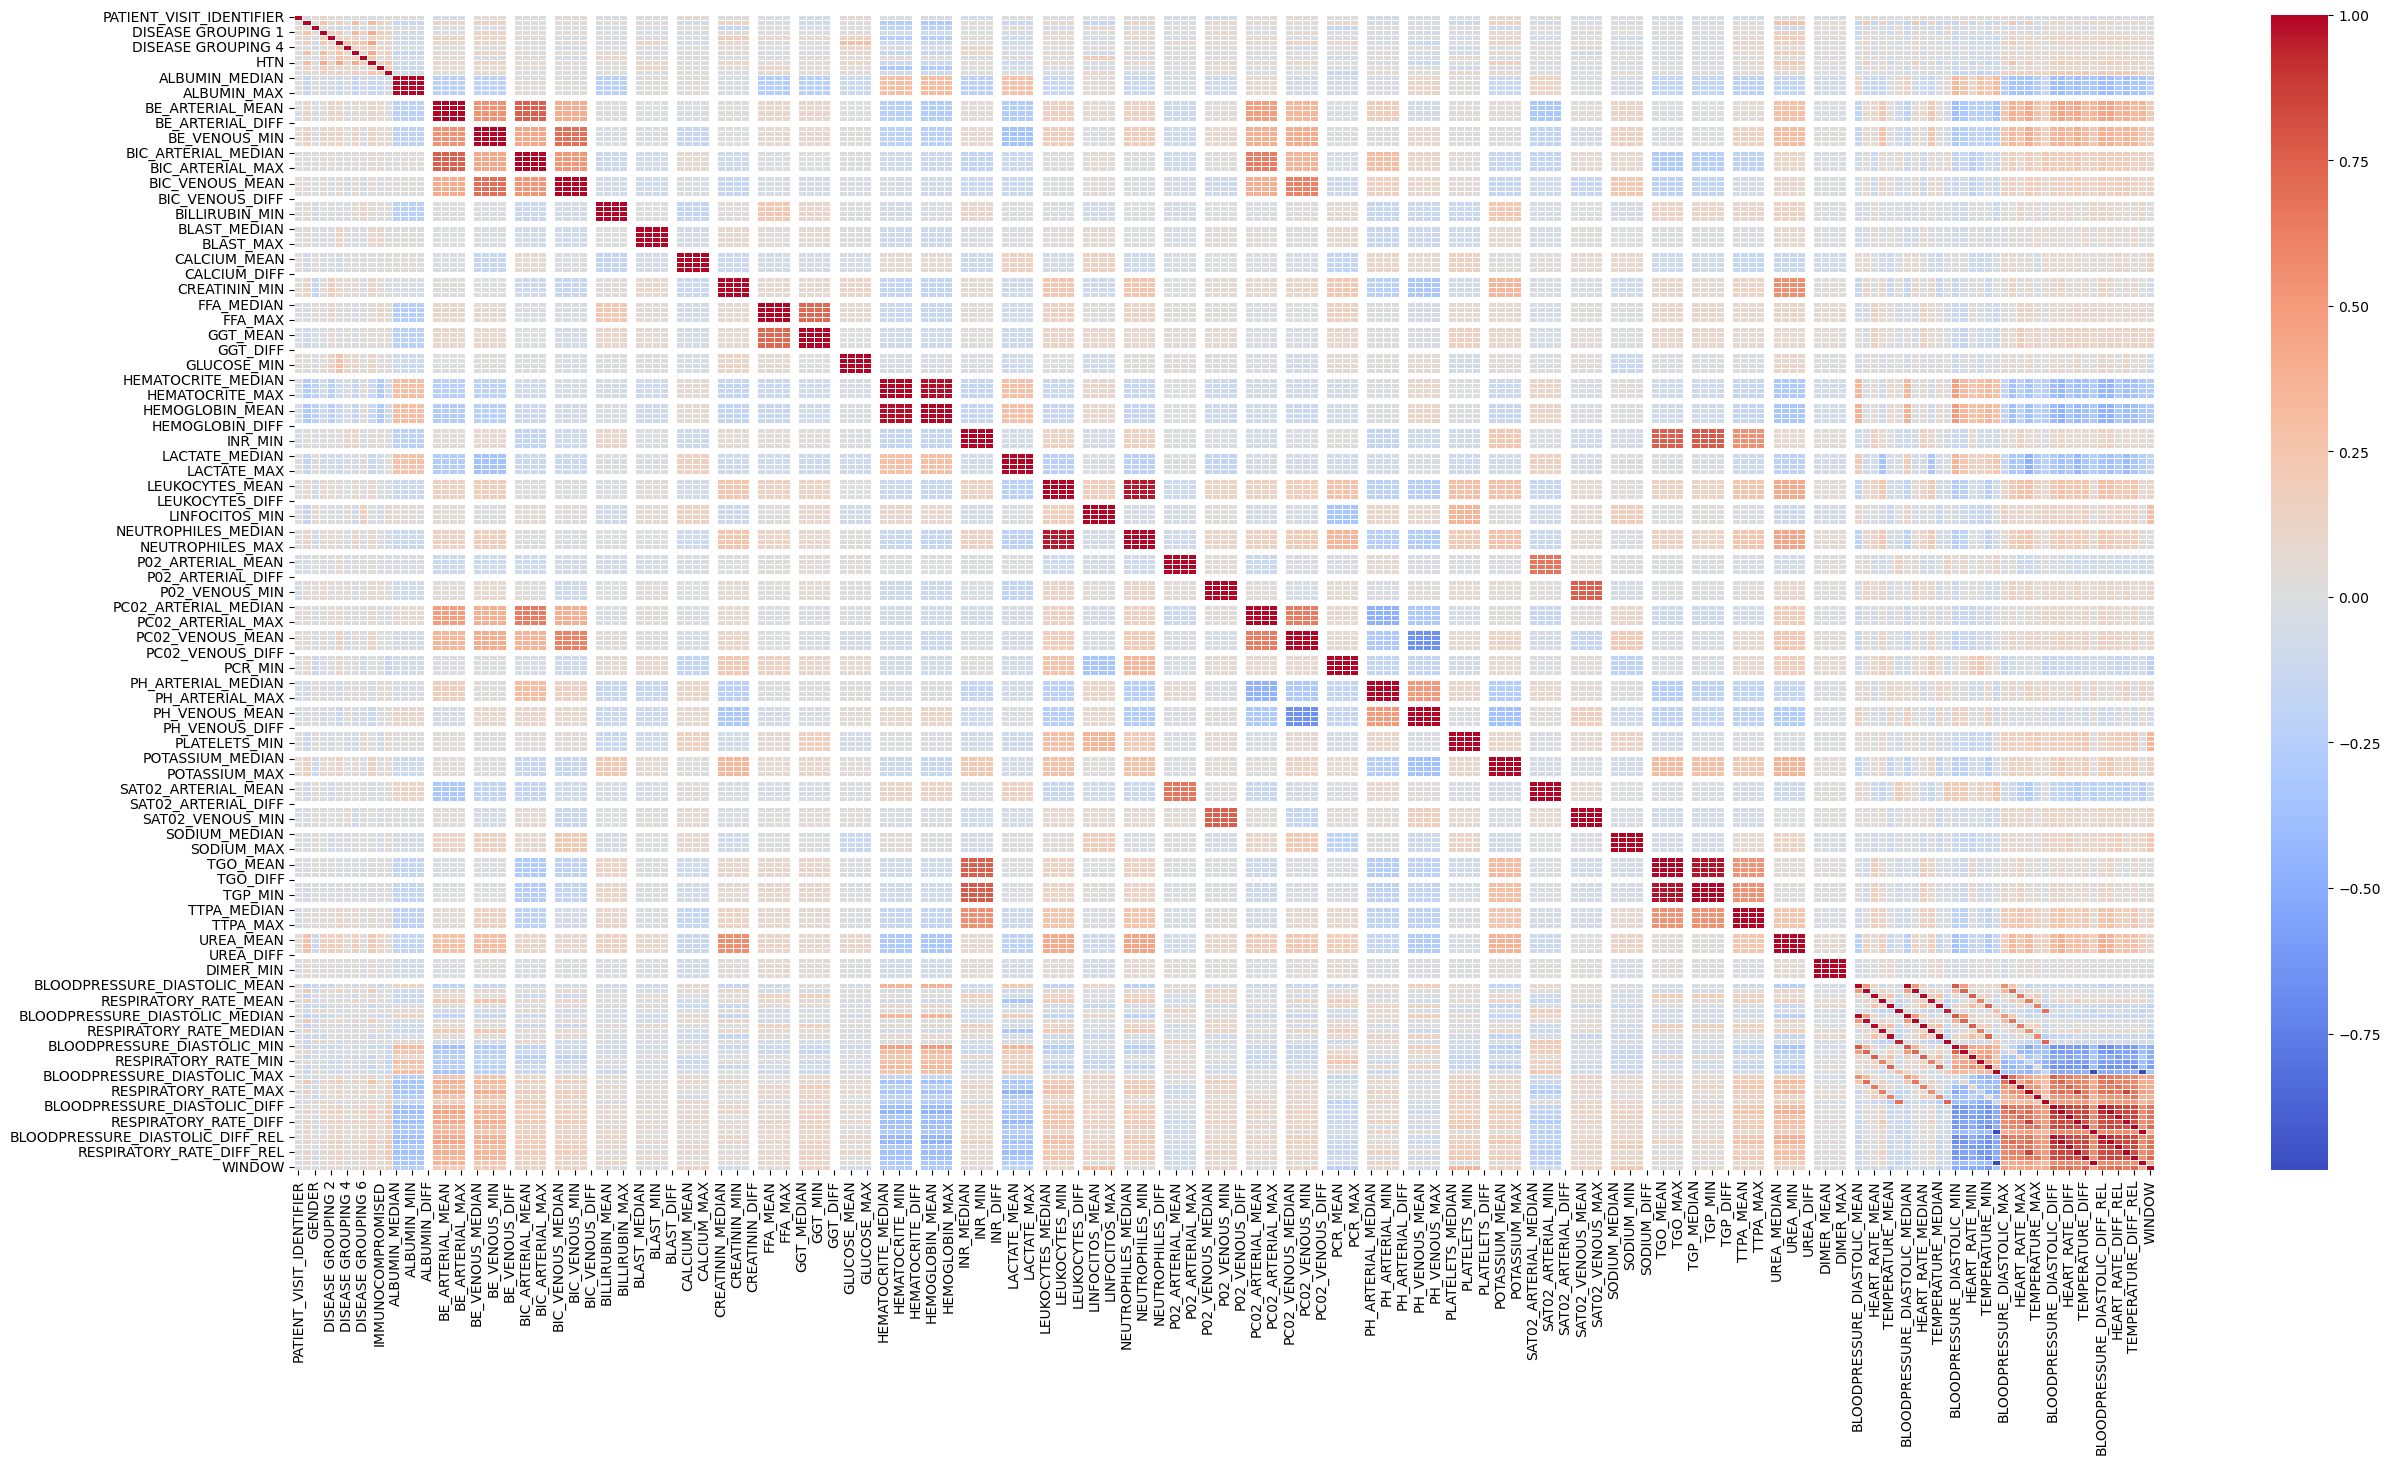

In [16]:
correlation_matrix = data.corr(numeric_only= True)
plt.figure(figsize=(30,15))

sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5)
plt.show()

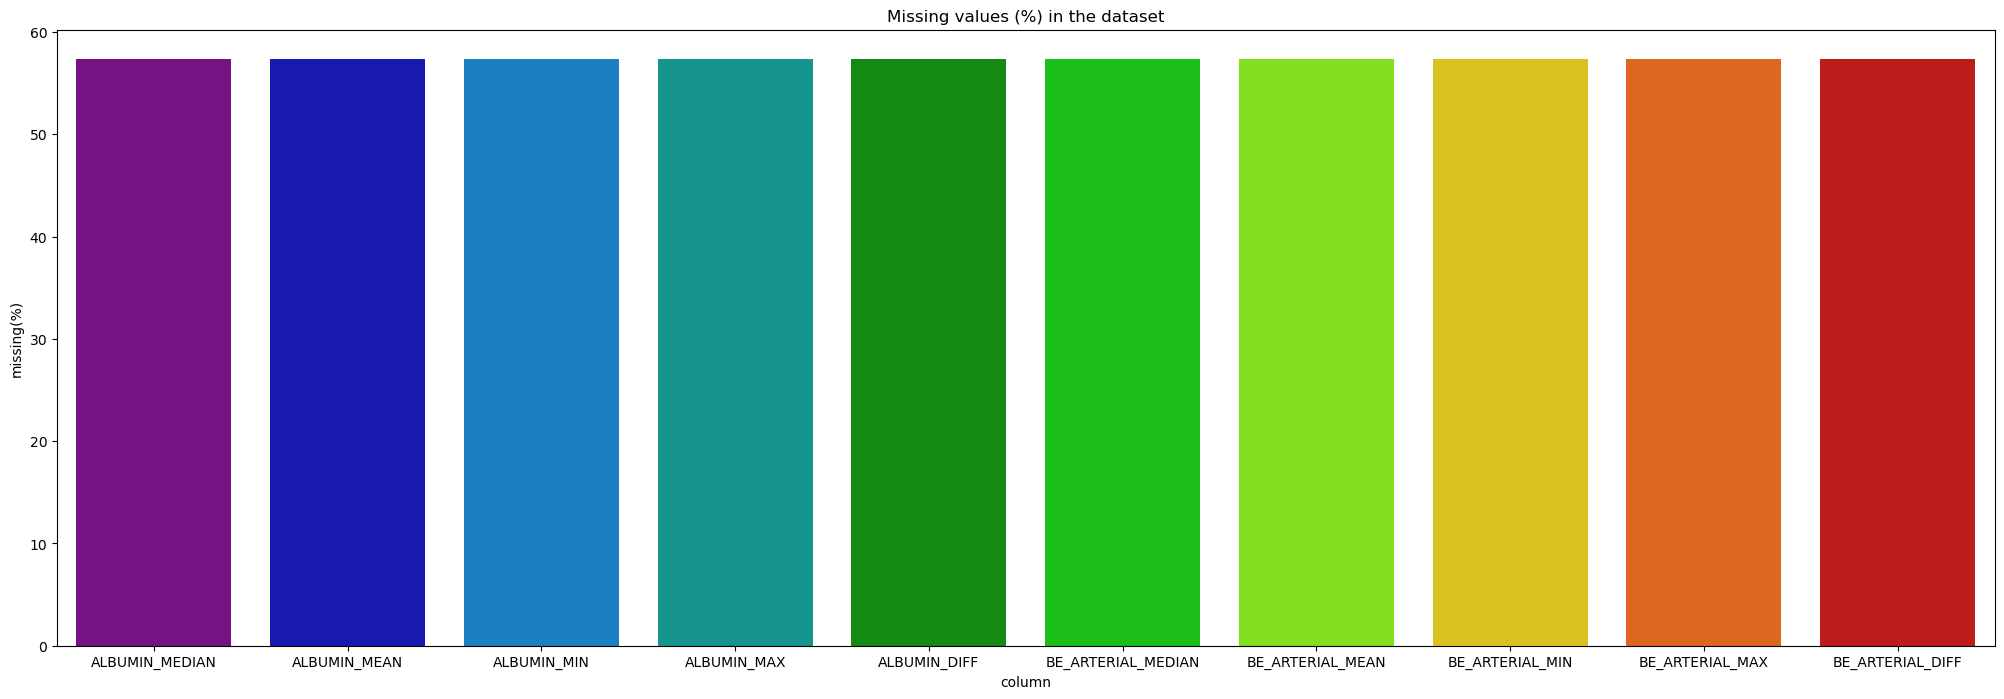

In [17]:
data_missing = pd.DataFrame({'column': data.columns, 'missing(%)' : ((data.isna()).sum()/data.shape[0])*100})
data_missing_nl = data_missing.nlargest(10,'missing(%)')

sns.set_palette(sns.color_palette('nipy_spectral'))

plt.figure(figsize=(25,8))
sns.barplot(data = data_missing_nl, x='column', y='missing(%)', palette='nipy_spectral')
plt.title('Missing values (%) in the dataset')
plt.show()

# **Observing Target Variable**
Univirate Exploration for Binary feature of our dataset

In [18]:
target.value_counts()

ICU
0    1410
1     515
Name: count, dtype: int64

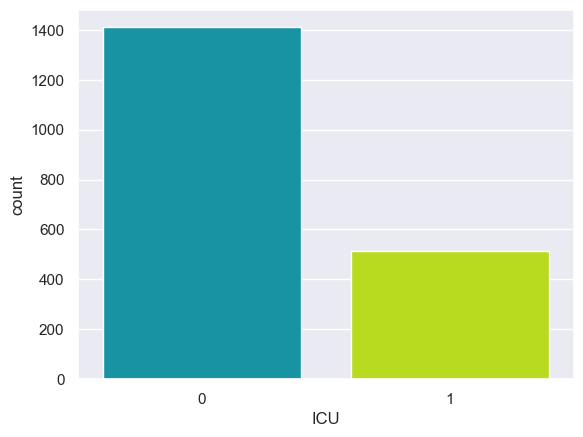

In [19]:
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=target,palette = 'nipy_spectral')
plt.show()

In [20]:
var = meta_data[(meta_data.type =='binary') & (meta_data.preserve)].index
data_icu[var].describe()

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,ICU
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.467532,0.368831,0.108052,0.028052,0.097662,0.019740,0.127792,0.046753,0.267532
std,0.499074,0.482613,0.310527,0.165164,0.296935,0.139143,0.333945,0.211165,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Univariate Exploration of Binary Features <br/>

['AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6']
[53.246753246753244, 63.116883116883116, 89.1948051948052, 97.19480519480518, 90.23376623376623, 98.02597402597402, 87.22077922077922, 95.32467532467533]
[46.75324675324675, 36.883116883116884, 10.805194805194805, 2.8051948051948052, 9.766233766233766, 1.9740259740259742, 12.779220779220779, 4.675324675324675]


<Figure size 640x480 with 0 Axes>

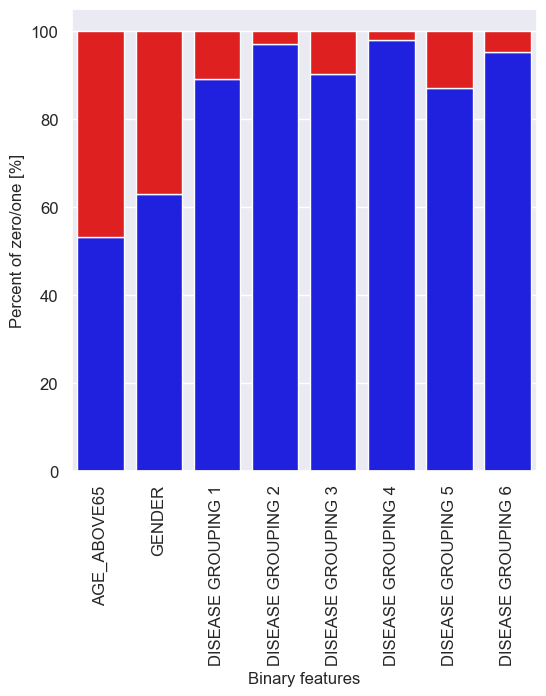

In [26]:
bin_col = [col for col in data.select_dtypes(include= 'int64').columns if set(data[col].unique())=={0,1}]
print(bin_col)
zero_list = []
one_list = []


for col in bin_col:
    zero_list.append(((data_icu[col])==0).sum()/data_icu.shape[0]*100)
    one_list.append(((data_icu[col])==1).sum()/data_icu.shape[0]*100)
plt.figure()

print(zero_list)
print(one_list)

fig, ax = plt.subplots(figsize=(6,6))

p1 = sns.barplot(ax=ax, x=bin_col, y=zero_list, color="blue")
p2 = sns.barplot(ax=ax, x=bin_col, y=one_list, bottom= zero_list, color = "red")
ax.set_ylabel('Percent of zero/one [%]', fontsize=12)
ax.set_xlabel('Binary features', fontsize=12)
locs,labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();


                    